In [12]:
from amld_rl.models.combinatorial_rl import CombinatorialRL
from amld_rl.run_cbrl_train import TSPConfig, ModelConfig
from amld_rl.trainer.cbrl_trainer import reward
from amld_rl.data.crl_datagen import TSPDatasetGenerator
from amld_rl.plots.plotlib import PlotTSPSolution

We present here the results of training of the combinatorial reinforcement learning model on instances of the Travelling Salesman Problem. We have trained the model on graphs containing 16 nodes. We start by loading the weights onto the model and then plot the solution of the RL agent on a random instance. 

In [13]:
#Create a small test dataset
dataset = TSPDatasetGenerator(
    num_nodes=16,
    num_samples=100
)

#create an instance of the combinatorial RL agent
tsp_data = TSPConfig(num_nodes=16)
model_data = ModelConfig(
    embedding_size=128,
    hidden_dim=128,
    n_glimpses=1,
    tanh_exploration=10,
    use_tanh=True,
    beta=.9,
    max_grad_norm=2,
    learning_rate=1e-4
)
agent = CombinatorialRL(
    embedding_size=model_data.embedding_size,
    hidden_dim=model_data.hidden_dim,
    seq_len=tsp_data.num_nodes,
    n_glimpses=model_data.n_glimpses,
    reward=reward,
    tanh_exploration=model_data.tanh_exploration,
    use_tanh=model_data.use_tanh,
    device="mps"
)
# Put on any device you want
agent.to("mps")
# Load the weights
agent.load_weights("../checkpoints/checkpoint-5e5DS-4.pth")


100%|██████████| 100/100 [00:00<00:00, 48006.23it/s]


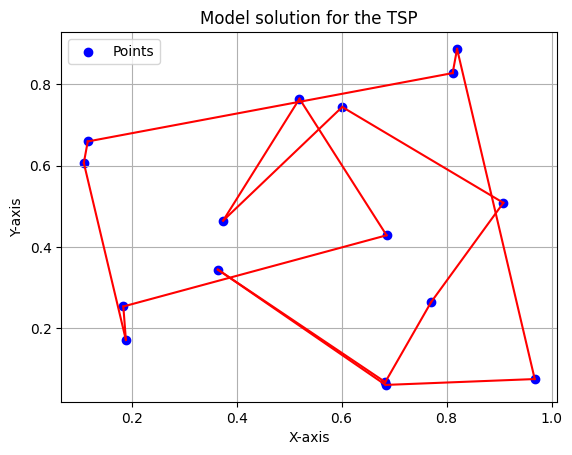

In [14]:
PlotTSPSolution.plot_tsp_solution(
    model=agent,
    dataset=dataset,
    n_samples=256,
)